In [1]:
import numpy as np
import pylab as pl
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot

from utils.sequences_treatment import *

from utils.particleFilter import *
from estimators.particleFilterEstimator import *
#from pfExample import *

In [49]:
T = 50
n_samples=3
windowSize = T
generatorType="tumour"
threshold = T

seeAction=True
seeMeasurement=False
seeEstimate=False
seeTime=True
seeSumAction = True

In [50]:
#Initialise the particle filter and create random trajectories
estimator=ParticleFilterEstimator(T,windowSize,threshold,generatorType=generatorType,seeAction=seeAction,seeMeasurement=seeMeasurement,seeEstimate=seeEstimate,seeTime=seeTime,seeSumAction=seeSumAction)
pf = estimator._pf

(z,meas,x) = samplePFSequence(pf, T,n_samples)
ts = [{"t":t} for t in np.linspace(0, T-1, T)]

# Corrupt measurements
sigmas=randomSigma(T,numberSamples=n_samples,p0=0)
meas=corruptSequence_mask(meas,sigmas)

<class 'utils.pfilter.ParticleFilter'>


## Test PFFilterAll

In [51]:
# compute estimate using PFFilterAll
est_filterAll=PFFilterAll(pf,meas)

C:\Users\nathan\OneDrive\UCL\Passerelle\TFE\github\optiMeasRL\utils\pfilter.py:372: RuntimeWarning: Degrees of freedom <= 0 for slice
  self.cov_state = np.cov(self.particles, rowvar=False, aweights=self.weights)
C:\Users\nathan\Anaconda3\envs\newenv\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


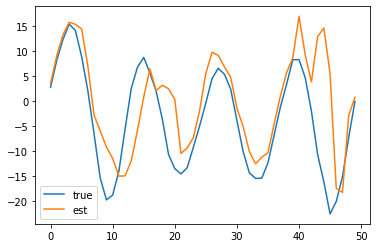

69.62671163407055


In [52]:
for idx_sample in [0]: #range(n_samples):
    pyplot.plot(z[idx_sample,:,:],label='true')
    pyplot.plot(est_filterAll[idx_sample,:,:],label='est')
    pyplot.legend()
    pyplot.show()
    
MSE_filterAll=np.mean((z-est_filterAll)**2)
print(MSE_filterAll)

## Test PFFilterOne

In [53]:
#Test PFFilterOne
est_filterOne = np.zeros((n_samples,T,z.shape[2]))

for sample_idx in range(n_samples):
    pf.init_filter()
    for t_idx in range(T):
        est_filterOne[sample_idx,t_idx,:] = PFFilterOne(pf,meas[sample_idx,t_idx],ts[t_idx]["t"])

C:\Users\nathan\OneDrive\UCL\Passerelle\TFE\github\optiMeasRL\utils\pfilter.py:372: RuntimeWarning: Degrees of freedom <= 0 for slice
  self.cov_state = np.cov(self.particles, rowvar=False, aweights=self.weights)
C:\Users\nathan\Anaconda3\envs\newenv\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


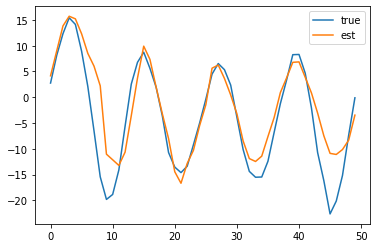

29.44631102508202


In [54]:
for idx_sample in [0]: #range(n_samples):
    pyplot.plot(z[idx_sample,:,:],label='true')
    pyplot.plot(est_filterOne[idx_sample,:,:],label='est')
    pyplot.legend()
    pyplot.show()
    
MSE_filterOne=np.mean((z-est_filterOne)**2)
print(MSE_filterOne)

## Test ParticleFilterEstimator - .estimate()

In [55]:
# construct estimator
pf_est = estimator

In [56]:
est_estimator = np.zeros((n_samples,T,z.shape[2]))
for idx_sample in range(n_samples):
    pf_est.reset()
    for t_idx in range(T):
        est_estimator[idx_sample,t_idx,:] = pf_est.estimate(meas[idx_sample,t_idx,:])

C:\Users\nathan\OneDrive\UCL\Passerelle\TFE\github\optiMeasRL\utils\pfilter.py:372: RuntimeWarning: Degrees of freedom <= 0 for slice
  self.cov_state = np.cov(self.particles, rowvar=False, aweights=self.weights)
C:\Users\nathan\Anaconda3\envs\newenv\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\nathan\Anaconda3\envs\newenv\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\nathan\OneDrive\UCL\Passerelle\TFE\github\optiMeasRL\utils\pfilter.py:363: RuntimeWarning: divide by zero encountered in log
  self.weight_entropy = np.sum(self.weights * np.log(self.weights))
C:\Users\nathan\OneDrive\UCL\Passerelle\TFE\github\optiMeasRL\utils\pfilter.py:363: RuntimeWarning: invalid value encountered in multiply
  self.weight_entropy = np.sum(self.weights * np.log(self.weights))


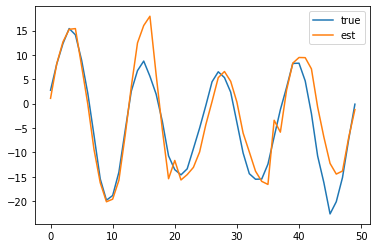

43.97328660041877


In [57]:
for idx_sample in [0]: #range(n_samples):
    pyplot.plot(z[idx_sample,:,:],label='true')
    pyplot.plot(est_estimator[idx_sample,:,:],label='est')
    pyplot.legend()
    pyplot.show()
    
MSE_estimator=np.mean((z-est_estimator)**2)
print(MSE_estimator)

## Test ParticleFilterEstimator - .estimateAll()

In [58]:
est_estimateAll=pf_est.estimateAll(meas)

C:\Users\nathan\OneDrive\UCL\Passerelle\TFE\github\optiMeasRL\utils\pfilter.py:372: RuntimeWarning: Degrees of freedom <= 0 for slice
  self.cov_state = np.cov(self.particles, rowvar=False, aweights=self.weights)
C:\Users\nathan\Anaconda3\envs\newenv\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


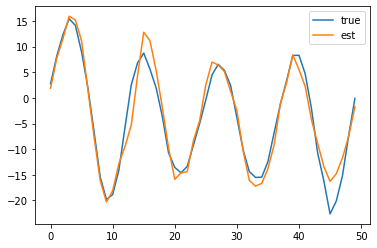

65.38360365606187


In [59]:
for idx_sample in [0]: #range(n_samples):
    pyplot.plot(z[idx_sample,:,:],label='true')
    pyplot.plot(est_estimateAll[idx_sample,:,:],label='est')
    pyplot.legend()
    pyplot.show()
    
MSE_estimateAll=np.mean((z-est_estimateAll)**2)
print(MSE_estimateAll)